<a href="https://colab.research.google.com/github/atwine/ace-class-notes/blob/master/Dimensionality_Reduction_DataCamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## When you want to visually explore the patterns in a high dimensional dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#read in the data
data = pd.read_csv("https://assets.datacamp.com/production/repositories/3515/datasets/802fc5cdbe3a29248483e496a966627ea9629e7a/ANSUR_II_FEMALE.csv")

In [3]:
#look at the head
data.head(3)

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,...,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Support,Regular Army,Female,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,...,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,152,756,65.7,1.560,26.997041,Overweight,Normal
1,Combat Service Support,Regular Army,Female,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,...,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,155,815,53.4,1.665,19.262506,Normal,Normal
2,Combat Service Support,Regular Army,Female,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,...,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,162,799,66.3,1.711,22.647148,Normal,Tall


In [4]:
#shape of the data
data.shape

(1986, 99)

In [0]:
#lets take only the numeric data
dt = data.select_dtypes(exclude='object')

In [6]:
#new shape
dt.shape

(1986, 94)

In [0]:
#get t-SNE
from sklearn.manifold import TSNE

m = TSNE(learning_rate=50)

tsne_features = m.fit_transform(dt)

In [8]:
#it reduces the features into a two dimensional one.
tsne_features[1:4,:]

array([[ -4.6460032, -40.48791  ],
       [-19.894072 , -27.56942  ],
       [-24.738132 ,   7.966632 ]], dtype=float32)

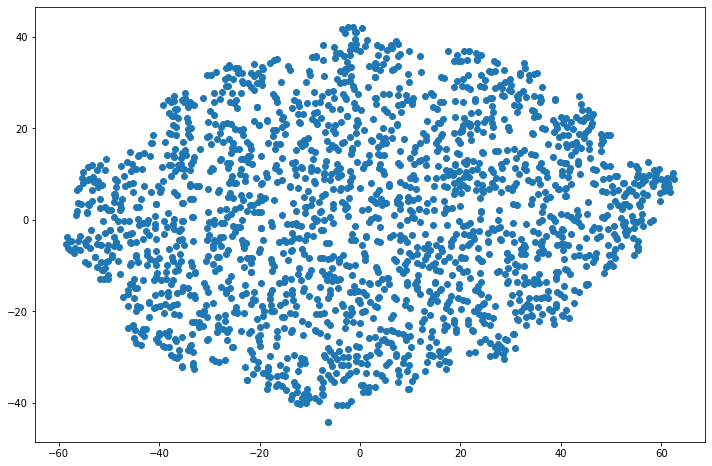

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(x=tsne_features[:,0],y=tsne_features[:,1])

#I have to find a way to put these results in the dt dataframe and work with them there
#I would want to visualize how heigh affects the distribution e.t.c

# Removing Features

1 -Variance Threshold

2 -High number of missing values.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
        86, 87, 88, 89, 90, 91, 92, 93, 94]),
 <a list of 94 Text major ticklabel objects>)

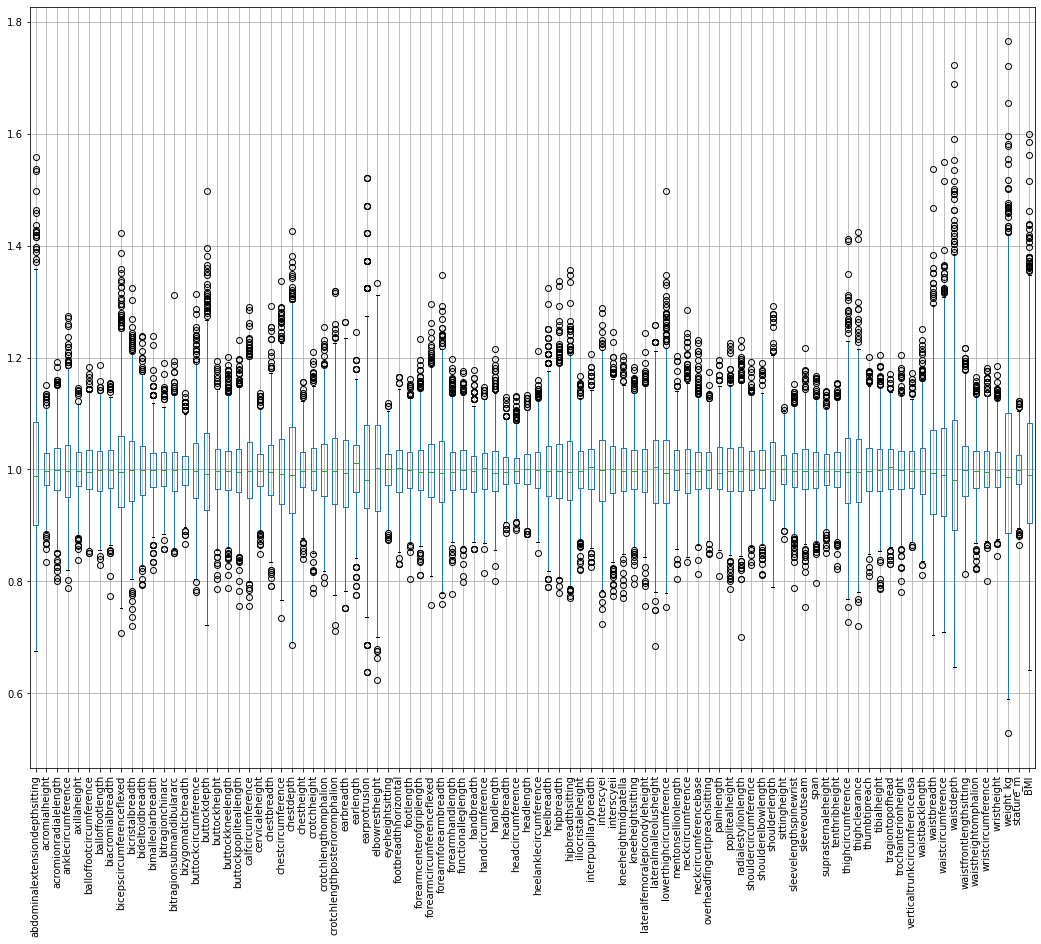

In [46]:
#let's draw the boxplot to show variance
#variance is affected by different scales of data so we normalize the data by dividing by the mean
dt_norm = dt/dt.mean()
plt.figure(figsize = (18,14))
dt_norm.boxplot()
plt.xticks(rotation='vertical')
#we can see the variance normalized at 10

In [34]:
#let's see the variances of all the features
list(dt_norm.var().sort_values(ascending=False))[:20]

[0.026281388190225897,
 0.021689614994511382,
 0.01877197853310506,
 0.01875529617208825,
 0.016963347661495994,
 0.013473994470864599,
 0.012755787812620725,
 0.01221022494210274,
 0.012078548319412467,
 0.010909104241888172,
 0.010130786183765356,
 0.008204608384362806,
 0.007700789927583826,
 0.007628374548528208,
 0.007014264997366014,
 0.0070079680463572885,
 0.00695285389983951,
 0.006869515365066108,
 0.006738086346872471,
 0.006634223006816111]

In [0]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.01)

# Fit the selector to normalized head_df
sel.fit(dt / dt.mean())

# Create a boolean mask
mask = sel.get_support()

In [0]:
#let's take these values that qualify from the dataset
#having a high variance means the feature spread touches different subcategories.
data = dt.loc[:,mask]

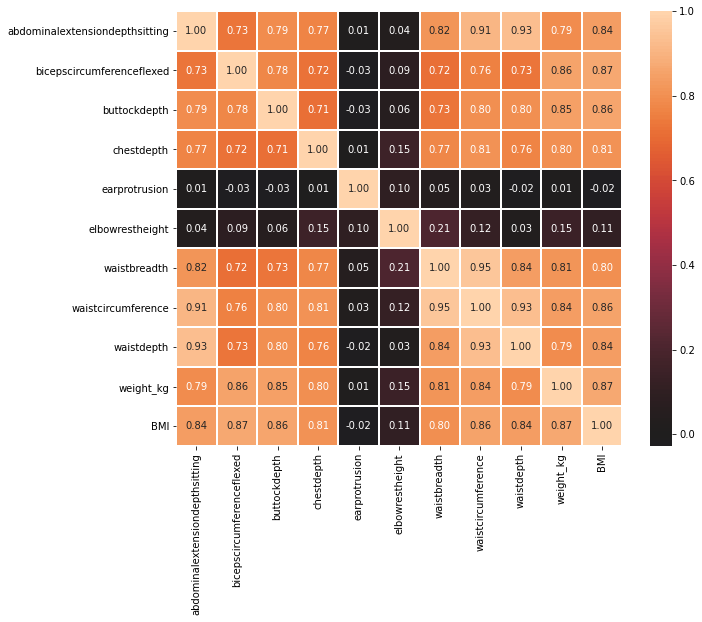

In [39]:
#let's visualize this in a heatmap
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), center=0, linewidths=1, annot=True, fmt=".2f")

In [0]:
# Create the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Notes:
Features that are perfects correlated: positive or negative bring no new information to the model but increase the complexity of the model we have to drop one.

Strong correlation does not imply causation.

Make sure you visually look at the diagrams of the scatter plots to see the relationship in the variables because sometimes its non linear and still the correlation is high, e.g in the image.

---

We can drop highly correlated features like this:



```
# Calculate the correlation matrix and take the absolute value
corr_matrix = ansur_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]

# Drop the features in the to_drop list
reduced_df = ansur_df.drop(to_drop, axis=1)

print("The reduced_df dataframe has {} columns".format(reduced_df.shape[1]))

```






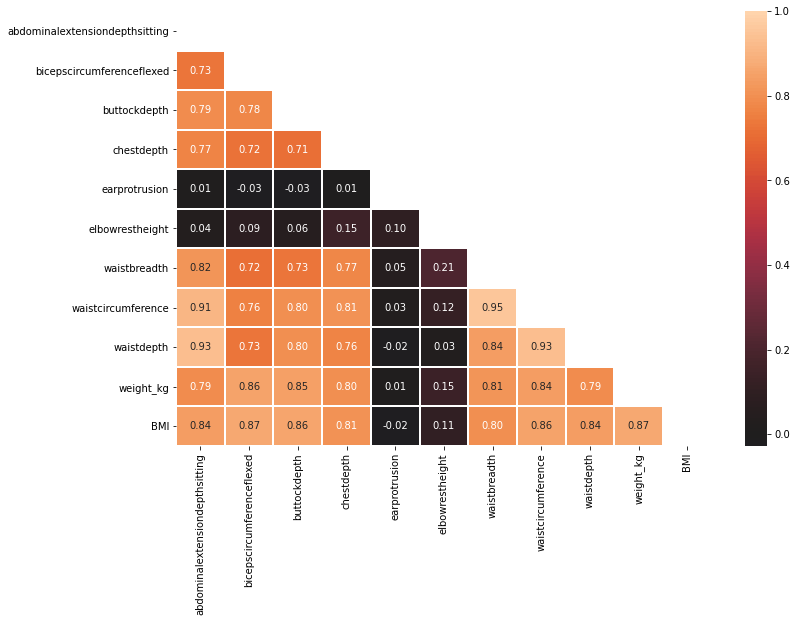

In [42]:
# Add the mask to the heatmap
plt.figure(figsize = (12,8))
sns.heatmap(corr, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

#Select Features based on Importance.

## RFE:-

How does it work?

It is applied on linear algorithms that have feature coefficients as we shall see below.

It then removes each feature that has tending to 0 coefficient one by one.

```
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Fit the logistic regression model on the scaled training data
lr.fit(X_train_std, y_train)

# Scale the test features
X_test_std = scaler.transform(X_test)

# Predict diabetes presence on the scaled test set
y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred))) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

```



```
# Set the feature eliminator to remove 2 features on each step
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, step=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)
```



# Feature Extraction

Calculating New features from the old